# 인공 신경망

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [ ]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

In [ ]:
# 텐서플로우에서 내장데이터로 패션 MNIST 데이터를 제공하고 있음
# X_train, y_train, X_test, y_test = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test)
# 가로 세로 픽셀값 & 샘플 수

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)
# 6만개의 이미지, 각 이미지는 28 * 28 사이즈

(60000, 28, 28) (60000,)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)
# 1만개의 이미지, 각 이미지는 28 * 28 사이즈

(10000, 28, 28) (10000,)


In [ ]:
print(X_train[1])
print(X_train[1].shape)

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

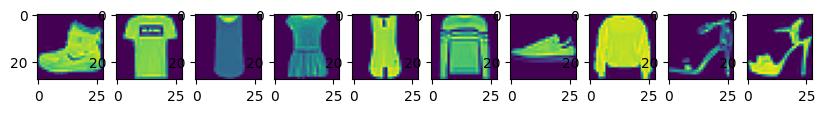

In [ ]:
# 픽셀값은 0 ~ 255 높을수록 하얗게 나옴
import matplotlib.pyplot as plt
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력
# 1개의 행과 10 열을 가진 서브플롯 생성
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i]) # 반전된 흑백 이미지
    # axs[i].axis('off')
plt.show()
# 신발과 다양한 종류의 옷들이 출력됨

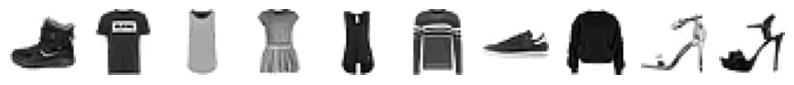

In [ ]:
import matplotlib.pyplot as plt
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력
# 1개의 행과 10 열을 가진 서브플롯 생성
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray_r') # 반전된 흑백 이미지
    axs[i].axis('off') # 축 표시 제거
plt.show()
# 신발과 다양한 종류의 옷들이 출력됨

In [ ]:
# 훈련 데이터 타깃값 0 ~ 9
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
# 타깃값 레이블 당 샘플 개수 확인
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

### 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동함
# 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려 올 수 없음
# 표준화가 필요한 이유
x_train_scale = X_train / 255

In [ ]:
x_train_scale.shape

(60000, 28, 28)

In [ ]:
x_train_scale = x_train_scale.reshape(-1 , 28*28)

In [ ]:
28*28

784

In [ ]:
x_train_scale.shape

(60000, 784)

In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
# 로지스틱 손실 함수
sgd = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'fit_time': array([11.69467616, 11.63196397, 12.29238915, 12.37719107,  9.26280308]), 'score_time': array([0.04349637, 0.04353738, 0.09438348, 0.09068966, 0.03146219]), 'test_score': array([0.83075   , 0.82025   , 0.82041667, 0.808     , 0.81858333])}


In [ ]:
print(np.mean(scores['test_score']))

0.8196000000000001


In [ ]:
# 반복 횟수 증가
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)

{'fit_time': array([22.59114337, 22.06548405, 27.66879964, 27.5738523 , 14.99740744]), 'score_time': array([0.04312348, 0.04989338, 0.0409677 , 0.04492784, 0.03922915]), 'test_score': array([0.83116667, 0.83008333, 0.8245    , 0.83966667, 0.83108333])}


In [ ]:
print(np.mean(scores['test_score']))

0.8312999999999999


### 인공신경망으로 모델 만들기

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

In [ ]:
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(60000, 784)
(48000, 784)
(12000, 784)


In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 모델 훈련
model.fit(x_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4280 - accuracy: 0.8555


In [ ]:
# 모델 평가
model.evaluate(x_train_scale_val, y_train_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]

## 희소행렬

In [ ]:
# 사이킷런으로 더미변수 만들기
from sklearn.preprocessing import OneHotEncoder
# 전처리 엔코더 객체
onehot_encoder = OneHotEncoder()

In [ ]:
len(y_train)

60000

In [ ]:
# 1차원 배열을 2차원 배열로 변환
reshaped = y_train.reshape(len(y_train), 1)
print(reshaped.shape)

(60000, 1)


In [ ]:
# 원-핫 엔코딩
# 희소행렬 = (행, 열) 좌표 & 값(1)
# 0 ~ 9
# (0, 9)	1.0 => 행 인덱스 번호 0에서 9 라는 숫자가 가지고 있는 열의 값이 1
# = 0번 행의 값은 9번 클래스
oh = onehot_encoder.fit_transform(reshaped)
print(y_train[:15])
print(oh[:15])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]
  (0, 9)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (6, 7)	1.0
  (7, 2)	1.0
  (8, 5)	1.0
  (9, 5)	1.0
  (10, 0)	1.0
  (11, 9)	1.0
  (12, 5)	1.0
  (13, 5)	1.0
  (14, 7)	1.0


In [ ]:
type(oh)

scipy.sparse._csr.csr_matrix

## iris 데이터

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

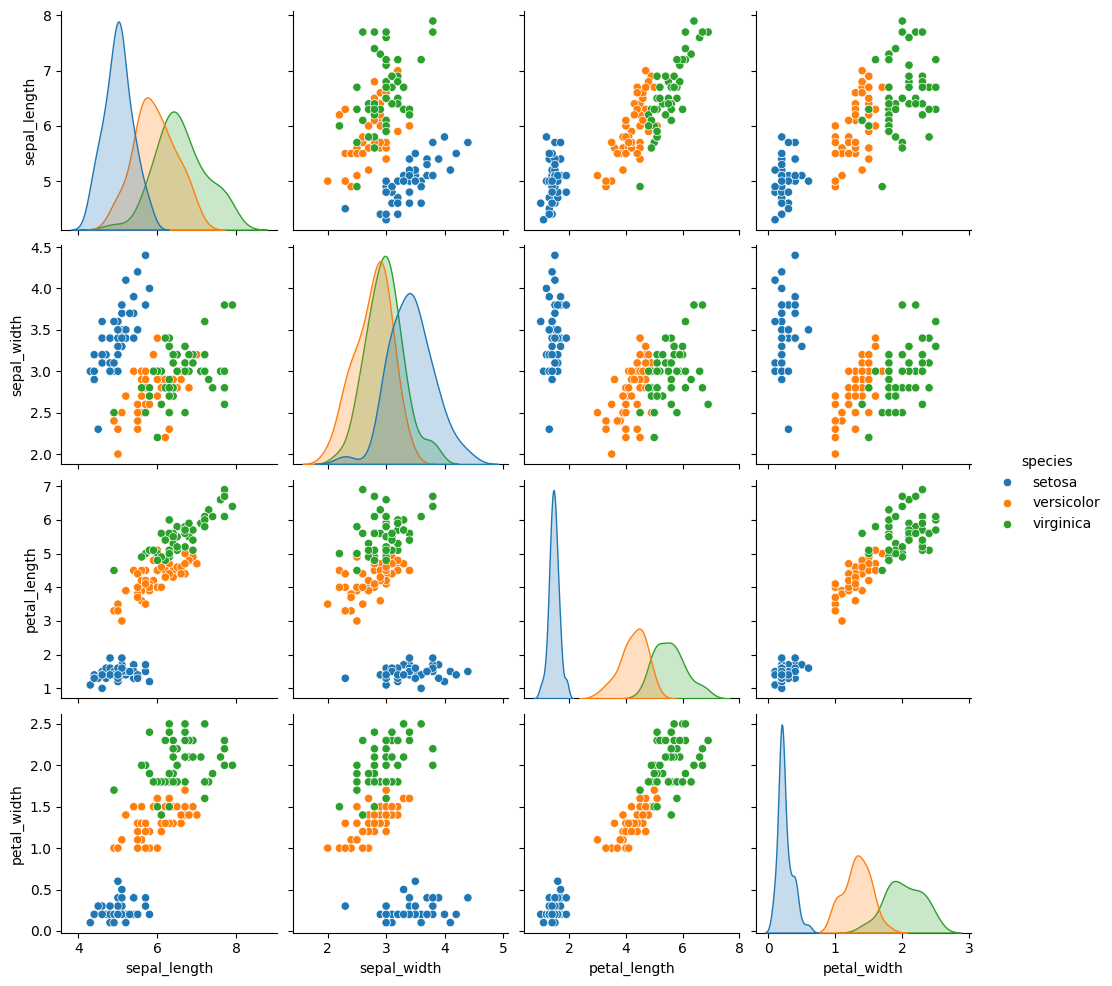

In [ ]:
# pair plot
sns.pairplot(data = df, hue = 'species')
plt.show()

In [ ]:
# 데이터 분할
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = df.drop('species', axis = 1)
y = df['species']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

print(X.head())
print(y.head())

X 데이터:  (150, 4)
y 데이터:  (150,)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [ ]:
print(y)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [ ]:
print("x_train 데이터: ", x_train.shape)
print("x_test 데이터: ", x_test.shape)

x_train 데이터:  (120, 4)
x_test 데이터:  (30, 4)


### 로지스틱 회귀로 분류하기

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(x_train)
x_train_scale = standard.transform(x_train)
x_test_scale = standard.transform(x_test)

In [ ]:
# 확률적 경사 하강법 (로지스틱 손실 함수)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'fit_time': array([0.0138824 , 0.00776291, 0.00459552, 0.00397229, 0.01023221]), 'score_time': array([0.00255466, 0.00137329, 0.00666046, 0.00617886, 0.00174451]), 'test_score': array([0.83333333, 0.95833333, 0.83333333, 1.        , 0.75      ])}


In [ ]:
print(np.mean(scores['test_score']))

0.875


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)

{'fit_time': array([0.00623107, 0.0139029 , 0.0133388 , 0.01251101, 0.00943828]), 'score_time': array([0.0010829 , 0.00111151, 0.00101423, 0.00129056, 0.00103116]), 'test_score': array([0.79166667, 0.91666667, 0.83333333, 0.70833333, 0.95833333])}


In [ ]:
print(np.mean(scores['test_score']))

0.8416666666666666


### 인공신경망

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

In [ ]:
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(3, activation = 'softmax', input_shape = (4,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
y_train_sub

array([2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 0, 0])

In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.7379 - accuracy: 0.1042
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7103 - accuracy: 0.1146
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6910 - accuracy: 0.1146
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6746 - accuracy: 0.1146
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 1.6596 - accuracy: 0.1250
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6451 - accuracy: 0.1250
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6316 - accuracy: 0.1250
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6182 - accuracy: 0.1250
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6052 - accuracy: 0.1250
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5925 - accuracy: 0.1250
Epoch 11/100
3/3 [==========

In [ ]:
# 모델 평가
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 158ms/step - loss: 0.9537 - accuracy: 0.5833


[0.9536697268486023, 0.5833333134651184]

### 로지스틱 회귀 분석으로 다시 해보자

In [ ]:
# 로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_scale_sub, y_train_sub)

LogisticRegression()

In [ ]:
print(logit.score(x_train_scale_val, y_train_val))

0.9166666666666666


## wine 데이터

In [ ]:
# 사이킷런의 내장데이터 이용

In [ ]:
from sklearn import datasets
data = datasets.load_wine()

In [ ]:
# 특성
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df['class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (142, 13)
test 데이터:  (36, 13)


### 로지스틱 회귀로 분류하기

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 확률적 경사 하강법 (로지스틱 손실 함수)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 50, random_state=42)
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'fit_time': array([0.01482654, 0.00559282, 0.00499034, 0.0048883 , 0.00519466]), 'score_time': array([0.00170469, 0.00142455, 0.0013938 , 0.00123072, 0.00665236]), 'test_score': array([0.96551724, 0.96551724, 1.        , 0.96428571, 1.        ])}
0.9790640394088671


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 100, random_state=42)
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00751376, 0.01126361, 0.00505471, 0.00917506, 0.00484967]), 'score_time': array([0.00123763, 0.00143075, 0.00115991, 0.00133872, 0.00137138]), 'test_score': array([0.96551724, 0.96551724, 1.        , 0.96428571, 1.        ])}
0.9790640394088671


### 인공신경망

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

print(X_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(142, 13)
(113, 13)
(29, 13)


In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(3, activation = 'softmax', input_shape = (13,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
y_train_sub

168    2
144    2
89     1
75     1
26     0
      ..
62     1
134    2
76     1
110    1
131    2
Name: class, Length: 113, dtype: int64

In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 1.6961 - accuracy: 0.2920
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.6366 - accuracy: 0.3009
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.5953 - accuracy: 0.3009
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 1.5614 - accuracy: 0.3009
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5287 - accuracy: 0.3097
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 1.4989 - accuracy: 0.3274
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.4702 - accuracy: 0.3274
Epoch 8/200
4/4 [==============================] - 0s 8ms/step - loss: 1.4421 - accuracy: 0.3363
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 1.4138 - accuracy: 0.3363
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 1.3871 - accuracy: 0.3363
Epoch 11/200
4/4 [===========

In [ ]:
# 모델 평가
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 146ms/step - loss: 0.0683 - accuracy: 1.0000


[0.06834959238767624, 1.0]

### 로지스틱 회귀 분석으로 다시 해보자

In [ ]:
# 로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_scale_sub, y_train_sub)

LogisticRegression()

In [ ]:
print(logit.score(x_train_scale_val, y_train_val))

1.0


## Boston Housing price 데이터

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test)

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [ ]:
print(x_train.shape, y_train.shape)

(404, 13) (404,)


In [ ]:
print(x_test.shape, y_test.shape)

(102, 13) (102,)


### 선형 회귀로 분류하기

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(x_train)
x_train_scale = standard.transform(x_train)
x_test_scale = standard.transform(x_test)

In [ ]:
# 확률적 경사 하강법 (편차 제곱 손실 함수)
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
sgd = SGDRegressor(loss = 'squared_error', max_iter = 50, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'fit_time': array([0.00436735, 0.00440931, 0.00390649, 0.00352335, 0.00300193]), 'score_time': array([0.00114799, 0.00085998, 0.00079465, 0.000664  , 0.00066495]), 'test_score': array([0.65193648, 0.77661684, 0.65837693, 0.68095919, 0.728175  ])}
0.6992128898718077


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
sgd = SGDRegressor(loss = 'squared_error', max_iter = 100, random_state=42)
scores = cross_validate(sgd, x_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.0038743 , 0.01068425, 0.00433826, 0.00684381, 0.00340056]), 'score_time': array([0.0010798 , 0.00256538, 0.00098753, 0.00077701, 0.00088549]), 'test_score': array([0.65193648, 0.77661684, 0.65837693, 0.68095919, 0.728175  ])}
0.6992128898718077


### 인공신경망

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(404, 13)
(323, 13)
(81, 13)


In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(1, activation = 'linear', input_shape = (13,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
y_train_sub

array([50. , 22.9, 21.1, 24.1, 19.3, 18.3, 20.5, 19.5, 50. , 14.9, 17.4,
       39.8, 20. , 11.7,  7. , 19.9, 20.7, 23.2, 16.4, 18.9, 23.8, 16.5,
       19.4, 19.7, 50. , 15.6, 24.8, 15.6, 27.5,  8.4, 15.2, 23.5, 24.8,
        8.5, 19.3, 10.4, 22.8, 20.3, 13.4, 16.5, 11.7, 36.1, 23.1, 21.7,
       22.5, 37.2, 18.5, 20.1, 17.2,  5. , 23.7, 27.9, 19.5, 26.2, 20.6,
       32.2, 17.8, 21.4, 21.4, 24.8, 13.9,  5. , 21.4, 44.8, 23.4, 24.3,
       29.4, 50. , 23.9, 17.1, 11.3, 16.1, 17.4, 13.5, 12.1, 21.1, 26.6,
       43.5, 20.4, 20. , 29.8, 26.4, 17.8, 17.2, 23.7, 13.4, 33.4, 35.2,
       19.9, 16.2, 21.7, 19.3, 44. , 34.9, 19.6, 19.2, 22.5, 48.3,  6.3,
       24. , 13.1, 23.9,  8.7, 23.3, 31.6, 10.5, 13.8,  8.3, 21.7, 20.1,
       27.5, 13.2, 25. , 22.6, 12.5, 11.9, 17.2, 18.7, 22.8, 23.2, 18.2,
       30.5, 30.3,  7.2, 21.6, 13.8, 22.9, 20.4, 17.9, 19.3,  8.8, 33.4,
       22.8, 22.2, 20.4, 28.2, 50. , 18.9, 24.4, 17.5, 28.7, 50. , 32.7,
       23.1,  8.4, 10.9, 22.6, 18.9, 13.1, 11.8, 50

In [ ]:
# 모델 설정
model.compile(loss = 'mse', metrics = 'mae')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 200)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 607.4582 - mae: 22.8442
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 605.7787 - mae: 22.8252
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 604.2291 - mae: 22.8112
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 603.0442 - mae: 22.7967
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 601.8896 - mae: 22.7864
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 600.7197 - mae: 22.7727
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 599.3555 - mae: 22.7577
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 597.9917 - mae: 22.7447
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 596.6489 - mae: 22.7315
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 595.4413 - mae: 22.7193
Epoch 11/200
11/11 [=========

In [ ]:
# 모델 평가
model.evaluate(x_train_scale_val, y_train_val)

3/3 [==============================] - 0s 13ms/step - loss: 393.3967 - mae: 19.3341


[393.39666748046875, 19.33405303955078]

### 선형 회귀 분석으로 다시 해보자

In [ ]:
# 선형 회귀 분석
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scale_sub, y_train_sub)

LinearRegression()

In [ ]:
print(lr.score(x_train_scale_val, y_train_val))

0.6205189361087047


# 심층 신경망 - 밀집층 2개

## fashion mnist 데이터

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(x_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 표준화
x_train_scale = x_train / 255

In [ ]:
x_train_scale.shape

(60000, 28, 28)

In [ ]:
x_train_scale = x_train_scale.reshape(-1 , 28*28)

In [ ]:
x_train_scale.shape

(60000, 784)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(60000, 784)
(48000, 784)
(12000, 784)


### 심층 신경망 만들기

In [ ]:
# 심층 신경망
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784 * 100 + 100

78500

In [ ]:
100 * 10 + 10

1010

In [ ]:
# 층을 만드는 다른 방법 1
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = 'fashion mnist model')

In [ ]:
# 모델 요약
model.summary()

Model: "fashion mnist model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 층을 만드는 다른 방법 2
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 모델 훈련
model.fit(x_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5711 - accuracy: 0.8067
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8506
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3792 - accuracy: 0.8641
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3548 - accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3364 - accuracy: 0.8771


### 렐루 활성화 함수

In [ ]:
# 렐루 활성화 함수
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 표준화
x_train_scale = x_train / 255

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

In [ ]:
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(60000, 28, 28)
(48000, 28, 28)
(12000, 28, 28)


In [ ]:
# 모델 훈련
model.fit(x_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5298 - accuracy: 0.8116
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3521 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3288 - accuracy: 0.8820
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8865


In [ ]:
# 모델 평가 - 검증 점수
model.evaluate(x_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8768


[0.35551443696022034, 0.8768333196640015]

## iris 데이터

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

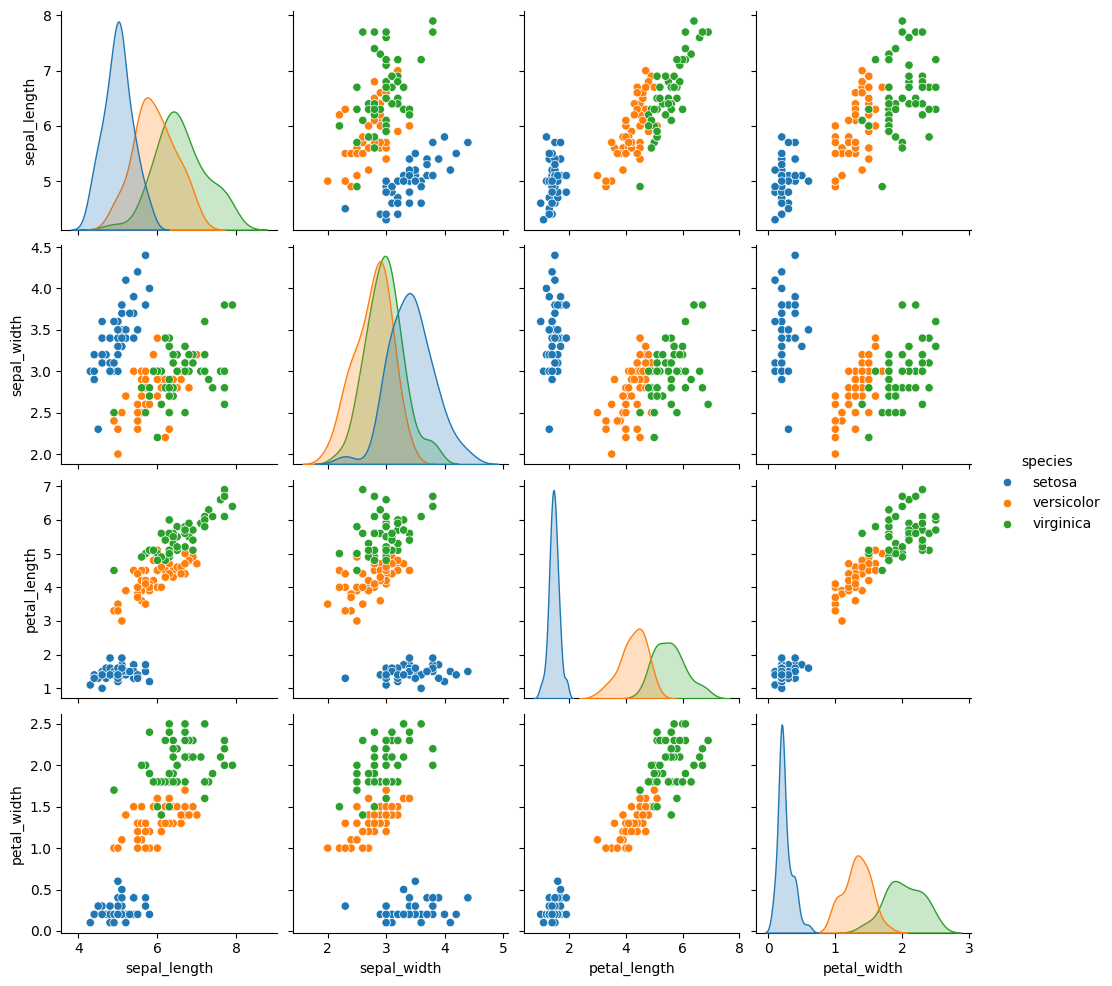

In [ ]:
# pair plot
sns.pairplot(data = df, hue = 'species')
plt.show()

In [ ]:
# 데이터 분할
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = df.drop('species', axis = 1).values
y = df['species'].values

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

print(X[:5])
print(y[:5])

X 데이터:  (150, 4)
y 데이터:  (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [ ]:
print(y)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [ ]:
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [ ]:
print("x_train 데이터: ", x_train.shape)
print("x_test 데이터: ", x_test.shape)

x_train 데이터:  (120, 4)
x_test 데이터:  (30, 4)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(x_train)
x_train_scale = standard.transform(x_train)
x_test_scale = standard.transform(x_test)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

In [ ]:
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


### 심층 신경망 만들기

In [ ]:
# 심층신경망모델 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = 'sigmoid', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 3)                 153       
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.0944 - accuracy: 0.6146
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0409 - accuracy: 0.6562
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0102 - accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9852 - accuracy: 0.6771
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9667 - accuracy: 0.6875
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9492 - accuracy: 0.6875
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9373 - accuracy: 0.7083
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9201 - accuracy: 0.6875
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9056 - accuracy: 0.7188
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.7292
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 168ms/step - loss: 0.3663 - accuracy: 0.9167


[0.3663094937801361, 0.9166666865348816]

### 렐루 활성화 함수

In [ ]:
# 심층신경망모델 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                250       
                                                                 
 dense_9 (Dense)             (None, 3)                 153       
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.1113 - accuracy: 0.3438
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0151 - accuracy: 0.5208
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9556 - accuracy: 0.6250
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9074 - accuracy: 0.6875
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8661 - accuracy: 0.7708
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8291 - accuracy: 0.7708
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7968 - accuracy: 0.7708
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7660 - accuracy: 0.7917
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7385 - accuracy: 0.7917
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7127 - accuracy: 0.7917
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 167ms/step - loss: 0.2432 - accuracy: 0.9167


[0.24317096173763275, 0.9166666865348816]

## wine 데이터

In [ ]:
from sklearn import datasets
data = datasets.load_wine()

In [ ]:
# 특성
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df['class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (142, 13)
test 데이터:  (36, 13)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

print("train 데이터: ", X_train_scale.shape)
print("test 데이터: ", X_test_scale.shape)

train 데이터:  (142, 13)
test 데이터:  (36, 13)


In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(X_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(142, 13)
(113, 13)
(29, 13)


### 심층 신경망 만들기

In [ ]:
# 심층신경망 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(200, activation = 'sigmoid', input_shape = (13, )))
model.add(keras.layers.Dense(100, activation = 'sigmoid'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               2800      
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 23203 (90.64 KB)
Trainable params: 23203 (90.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.1169 - accuracy: 0.3363
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0148 - accuracy: 0.5752
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9655 - accuracy: 0.6814
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9352 - accuracy: 0.6637
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8836 - accuracy: 0.6726
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.5929
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7861 - accuracy: 0.8673
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 0.7438 - accuracy: 0.8761
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.9027
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.8673
Epoch 11/50
4/4 [======================

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 168ms/step - loss: 0.0642 - accuracy: 1.0000


[0.06422664225101471, 1.0]

### 렐루 활성화 함수

In [ ]:
# 심층신경망 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(200, activation = 'relu', input_shape = (13, )))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               2800      
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 3)                 303       
                                                                 
Total params: 23203 (90.64 KB)
Trainable params: 23203 (90.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 50)

Epoch 1/50
4/4 [==============================] - 4s 7ms/step - loss: 0.8221 - accuracy: 0.7611
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.9823
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2365 - accuracy: 0.9912
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1596 - accuracy: 0.9912
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1156 - accuracy: 0.9912
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9912
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.9912
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9912
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0346 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

1/1 [==============================] - 0s 157ms/step - loss: 0.0183 - accuracy: 1.0000


[0.01834852248430252, 1.0]

## Boston Housing price 데이터

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [ ]:
(x_train, y_train), (x_test, y_test)

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(x_train)
x_train_scale = standard.transform(x_train)
x_test_scale = standard.transform(x_test)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(404, 13)
(323, 13)
(81, 13)


### 심층 신경망 만들기

In [ ]:
# 심층신경망 모델 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (13,)))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1400      
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1501 (5.86 KB)
Trainable params: 1501 (5.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', metrics = 'mae')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 4ms/step - loss: 618.0710 - mae: 22.9632
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 581.2921 - mae: 22.2092
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 550.8898 - mae: 21.5738
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 523.4113 - mae: 20.9677
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 498.0811 - mae: 20.4020
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 473.0625 - mae: 19.8191
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 447.6488 - mae: 19.2244
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 422.6591 - mae: 18.6247
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 398.6382 - mae: 18.0232
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 375.8914 - mae: 17.4353
Epoch 11/100
11/11 [=========

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

3/3 [==============================] - 0s 5ms/step - loss: 19.5886 - mae: 3.2327


[19.588563919067383, 3.2327284812927246]

### 렐루 활성화 함수

In [ ]:
# 심층신경망 모델 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (13,)))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1400      
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1501 (5.86 KB)
Trainable params: 1501 (5.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', metrics = 'mae')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 8ms/step - loss: 608.4305 - mae: 22.6443
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 576.6194 - mae: 21.9720
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 549.1510 - mae: 21.3948
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 523.3906 - mae: 20.8201
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 497.8767 - mae: 20.2518
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 470.9336 - mae: 19.6164
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 442.0993 - mae: 18.9383
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 412.7472 - mae: 18.2281
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 382.9650 - mae: 17.4717
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 354.1102 - mae: 16.7007
Epoch 11/100
11/11 [=========

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

3/3 [==============================] - 0s 8ms/step - loss: 9.4206 - mae: 2.2911


[9.420612335205078, 2.291107177734375]

## autompg 데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv', header = None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# horsepower 전처리
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [ ]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df['horsepower'].isnull().sum()

6

In [ ]:
df = df.dropna(subset = ['horsepower'], axis = 0)

In [ ]:
df['horsepower'].isnull().sum()

0

In [ ]:
df['horsepower'] = df['horsepower'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'name'],
      dtype='object')

In [ ]:
# 데이터 분할
x = df.drop(['mpg', 'model year', 'origin', 'name'], axis = 1)
y = df['mpg']

print("x 데이터: ", x.shape)
print("y 데이터: ", y.shape)

x 데이터:  (392, 5)
y 데이터:  (392,)


In [ ]:
# 훈련 / 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state=42)
print("훈련 데이터: ", x_train.shape)
print("테스트 데이터: ", x_test.shape)

훈련 데이터:  (313, 5)
테스트 데이터:  (79, 5)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(x_train)
x_train_scale = standard.transform(x_train)
x_test_scale = standard.transform(x_test)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_train_scale_sub, x_train_scale_val, y_train_sub, y_train_val = train_test_split(x_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(x_train_scale.shape)
print(x_train_scale_sub.shape)
print(x_train_scale_val.shape)

(313, 5)
(250, 5)
(63, 5)


### 심층 신경망 만들기

In [ ]:
# 심층신경망 모델 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (5, )))
model.add(keras.layers.Dense(50, activation = 'sigmoid'))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               600       
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5701 (22.27 KB)
Trainable params: 5701 (22.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', metrics = 'mae')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 606.0467 - mae: 23.1891
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 551.3995 - mae: 22.0083
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 517.4362 - mae: 21.2345
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 491.7463 - mae: 20.6340
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 470.8668 - mae: 20.1271
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 453.5577 - mae: 19.6839
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 438.5026 - mae: 19.3044
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 425.0191 - mae: 18.9506
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 412.8822 - mae: 18.6238
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 401.5579 - mae: 18.3172
Epoch 11/100
8/8 [==============================]

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

2/2 [==============================] - 0s 8ms/step - loss: 15.7122 - mae: 2.8902


[15.71222972869873, 2.890194892883301]

### 렐루 활성화 함수

In [ ]:
# 심층신경망 모델 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (5, )))
model.add(keras.layers.Dense(50, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               600       
                                                                 
 dense_30 (Dense)            (None, 50)                5050      
                                                                 
 dense_31 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5701 (22.27 KB)
Trainable params: 5701 (22.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', metrics = 'mae')

In [ ]:
model.fit(x_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 610.2043 - mae: 23.3277
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 570.5370 - mae: 22.4502
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 524.4247 - mae: 21.4045
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 472.2354 - mae: 20.1635
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 415.3883 - mae: 18.7353
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 357.0406 - mae: 17.1025
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 296.8556 - mae: 15.3922
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 237.2674 - mae: 13.6055
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 183.5072 - mae: 11.8688
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 136.7124 - mae: 10.1395
Epoch 11/100
8/8 [==============================]

In [ ]:
model.evaluate(x_train_scale_val, y_train_val)

2/2 [==============================] - 0s 8ms/step - loss: 15.3090 - mae: 2.7670


[15.309005737304688, 2.7670021057128906]